# scikit-FIBERS: HLA Notebook (First FIBERS Paper Data)


***
## Imports:

In [1]:
import os
import pickle
import pandas as pd
from sklearn.metrics import classification_report
from src.skfibers.fibers import FIBERS
#from src.skfibers.experiments.datagen import create_data_simulation_bin
from src.skfibers.experiments.datagen_evolvable_threshold import create_data_simulation_bin_evolve

current_working_directory = os.getcwd()
print(current_working_directory)

c:\Users\ryanu\OneDrive\Documents\GitHub\scikit-FIBERS


***
## Set Up Local Run Parameters


In [2]:
local_save = False
if local_save:
    output_folder = 'local_output'
else:
    output_folder = 'C:/Users/ryanu/Desktop/FIBERS_test_output'

***
## Load HLA Data

In [3]:
data_path = 'C:/Users/ryanu/Desktop/HLA/Imp1/Imp1.csv'
data_name = 'Imp1'
data = pd.read_csv(data_path,low_memory=False)
data.head(2)

,PX_ID,ORG_TY,DON_TY,DON_AGE,CAN_GENDER,CAN_RACE,CAN_ABO,REC_TX_ORG_TY,REC_AGE_AT_TX,CAN_SOURCE,...,DRB192,DRB193,DRB194,_imputation_,mmC0,mmC1,mmDQ0,mmDQ1,FIRST_TX,MOST_RECENT_TX
0,-1903455,KI: Kidney,C,47,F,8: White,O: O,KI: Kidney,35-49,NaN,...,0,0,0,1,0,1,0,1,0,1
1,17,KI: Kidney,C,38,M,2000: Hispanic/Latino,O: O,KI: Kidney,35-49,R,...,0,0,0,1,1,0,0,0,1,1


In [4]:
outcome_label = "graftyrs"
censor_label = "grf_fail"

amino_acids = ['A1', 'A10', 'A100', 'A101', 'A102', 'A103', 'A104', 'A105', 'A106', 'A107', 'A108', 'A109', 'A11', 'A110', 'A111', 'A112', 'A113', 'A114', 'A115', 'A116', 'A117', 'A118', 'A119', 'A12', 'A120', 'A121', 'A122', 'A123', 'A124', 'A125', 'A126', 'A127', 'A128', 'A129', 'A13', 'A130', 'A131', 'A132', 'A133', 'A134', 'A135', 'A136', 'A137', 'A138', 'A139', 'A14', 'A140', 'A141', 'A142', 'A143', 'A144', 'A145', 'A146', 'A147', 'A148', 'A149', 'A15', 'A150', 'A151', 'A152', 'A153', 'A154', 'A155', 'A156', 'A157', 'A158', 'A159', 'A16', 'A160', 'A161', 'A162', 'A163', 'A164', 'A165', 'A166', 'A167', 'A168', 'A169', 'A17', 'A170', 'A171', 'A172', 'A173', 'A174', 'A175', 'A176', 'A177', 'A178', 'A179', 'A18', 'A180', 'A181', 'A182', 'A183', 'A184', 'A185', 'A186', 'A187', 'A188', 'A189', 'A19', 'A190', 'A191', 'A192', 'A193', 'A194', 'A195', 'A196', 'A197', 'A198', 'A199', 'A2', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A3', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A4', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A5', 'A50', 'A51', 'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A6', 'A60', 'A61', 'A62', 'A63', 'A64', 'A65', 'A66', 'A67', 'A68', 'A69', 'A7', 'A70', 'A71', 'A72', 'A73', 'A74', 'A75', 'A76', 'A77', 'A78', 'A79', 'A8', 'A80', 'A81', 'A82', 'A83', 'A84', 'A85', 'A86', 'A87', 'A88', 'A89', 'A9', 'A90', 'A91', 'A92', 'A93', 'A94', 'A95', 'A96', 'A97', 'A98', 'A99', 'B1', 'B10', 'B100', 'B101', 'B102', 'B103', 'B104', 'B105', 'B106', 'B107', 'B108', 'B109', 'B11', 'B110', 'B111', 'B112', 'B113', 'B114', 'B115', 'B116', 'B117', 'B118', 'B119', 'B12', 'B120', 'B121', 'B122', 'B123', 'B124', 'B125', 'B126', 'B127', 'B128', 'B129', 'B13', 'B130', 'B131', 'B132', 'B133', 'B134', 'B135', 'B136', 'B137', 'B138', 'B139', 'B14', 'B140', 'B141', 'B142', 'B143', 'B144', 'B145', 'B146', 'B147', 'B148', 'B149', 'B15', 'B150', 'B151', 'B152', 'B153', 'B154', 'B155', 'B156', 'B157', 'B158', 'B159', 'B16', 'B160', 'B161', 'B162', 'B163', 'B164', 'B165', 'B166', 'B167', 'B168', 'B169', 'B17', 'B170', 'B171', 'B172', 'B173', 'B174', 'B175', 'B176', 'B177', 'B178', 'B179', 'B18', 'B180', 'B181', 'B182', 'B183', 'B184', 'B185', 'B186', 'B187', 'B188', 'B189', 'B19', 'B190', 'B191', 'B192', 'B193', 'B194', 'B2', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B3', 'B30', 'B31', 'B32', 'B33', 'B34', 'B35', 'B36', 'B37', 'B38', 'B39', 'B4', 'B40', 'B41', 'B42', 'B43', 'B44', 'B45', 'B46', 'B47', 'B48', 'B49', 'B5', 'B50', 'B51', 'B52', 'B53', 'B54', 'B55', 'B56', 'B57', 'B58', 'B59', 'B6', 'B60', 'B61', 'B62', 'B63', 'B64', 'B65', 'B66', 'B67', 'B68', 'B69', 'B7', 'B70', 'B71', 'B72', 'B73', 'B74', 'B75', 'B76', 'B77', 'B78', 'B79', 'B8', 'B80', 'B81', 'B82', 'B83', 'B84', 'B85', 'B86', 'B87', 'B88', 'B89', 'B9', 'B90', 'B91', 'B92', 'B93', 'B94', 'B95', 'B96', 'B97', 'B98', 'B99', 'C1', 'C10', 'C100', 'C101', 'C102', 'C103', 'C104', 'C105', 'C106', 'C107', 'C108', 'C109', 'C11', 'C110', 'C111', 'C112', 'C113', 'C114', 'C115', 'C116', 'C117', 'C118', 'C119', 'C12', 'C120', 'C121', 'C122', 'C123', 'C124', 'C125', 'C126', 'C127', 'C128', 'C129', 'C13', 'C130', 'C131', 'C132', 'C133', 'C134', 'C135', 'C136', 'C137', 'C138', 'C139', 'C14', 'C140', 'C141', 'C142', 'C143', 'C144', 'C145', 'C146', 'C147', 'C148', 'C149', 'C15', 'C150', 'C151', 'C152', 'C153', 'C154', 'C155', 'C156', 'C157', 'C158', 'C159', 'C16', 'C160', 'C161', 'C162', 'C163', 'C164', 'C165', 'C166', 'C167', 'C168', 'C169', 'C17', 'C170', 'C171', 'C172', 'C173', 'C174', 'C175', 'C176', 'C177', 'C178', 'C179', 'C18', 'C180', 'C181', 'C182', 'C183', 'C184', 'C185', 'C186', 'C187', 'C188', 'C189', 'C19', 'C190', 'C191', 'C192', 'C193', 'C194', 'C195', 'C196', 'C197', 'C198', 'C199', 'C2', 'C20', 'C200', 'C201', 'C202', 'C203', 'C204', 'C205', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C3', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C4', 'C40', 'C41', 'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48', 'C49', 'C5', 'C50', 'C51', 'C52', 'C53', 'C54', 'C55', 'C56', 'C57', 'C58', 'C59', 'C6', 'C60', 'C61', 'C62', 'C63', 'C64', 'C65', 'C66', 'C67', 'C68', 'C69', 'C7', 'C70', 'C71', 'C72', 'C73', 'C74', 'C75', 'C76', 'C77', 'C78', 'C79', 'C8', 'C80', 'C81', 'C82', 'C83', 'C84', 'C85', 'C86', 'C87', 'C88', 'C89', 'C9', 'C90', 'C91', 'C92', 'C93', 'C94', 'C95', 'C96', 'C97', 'C98', 'C99', 'DQB11', 'DQB110', 'DQB111', 'DQB112', 'DQB113', 'DQB114', 'DQB115', 'DQB116', 'DQB117', 'DQB118', 'DQB119', 'DQB12', 'DQB120', 'DQB121', 'DQB122', 'DQB123', 'DQB124', 'DQB125', 'DQB126', 'DQB127', 'DQB128', 'DQB129', 'DQB13', 'DQB130', 'DQB131', 'DQB132', 'DQB133', 'DQB134', 'DQB135', 'DQB136', 'DQB137', 'DQB138', 'DQB139', 'DQB14', 'DQB140', 'DQB141', 'DQB142', 'DQB143', 'DQB144', 'DQB145', 'DQB146', 'DQB147', 'DQB148', 'DQB149', 'DQB15', 'DQB150', 'DQB151', 'DQB152', 'DQB153', 'DQB154', 'DQB155', 'DQB156', 'DQB157', 'DQB158', 'DQB159', 'DQB16', 'DQB160', 'DQB161', 'DQB162', 'DQB163', 'DQB164', 'DQB165', 'DQB166', 'DQB167', 'DQB168', 'DQB169', 'DQB17', 'DQB170', 'DQB171', 'DQB172', 'DQB173', 'DQB174', 'DQB175', 'DQB176', 'DQB177', 'DQB178', 'DQB179', 'DQB18', 'DQB180', 'DQB181', 'DQB182', 'DQB183', 'DQB184', 'DQB185', 'DQB186', 'DQB187', 'DQB188', 'DQB189', 'DQB19', 'DQB190', 'DQB191', 'DQB192', 'DQB193', 'DQB194', 'DRB11', 'DRB110', 'DRB111', 'DRB112', 'DRB113', 'DRB114', 'DRB115', 'DRB116', 'DRB117', 'DRB118', 'DRB119', 'DRB12', 'DRB120', 'DRB121', 'DRB122', 'DRB123', 'DRB124', 'DRB125', 'DRB126', 'DRB127', 'DRB128', 'DRB129', 'DRB13', 'DRB130', 'DRB131', 'DRB132', 'DRB133', 'DRB134', 'DRB135', 'DRB136', 'DRB137', 'DRB138', 'DRB139', 'DRB14', 'DRB140', 'DRB141', 'DRB142', 'DRB143', 'DRB144', 'DRB145', 'DRB146', 'DRB147', 'DRB148', 'DRB149', 'DRB15', 'DRB150', 'DRB151', 'DRB152', 'DRB153', 'DRB154', 'DRB155', 'DRB156', 'DRB157', 'DRB158', 'DRB159', 'DRB16', 'DRB160', 'DRB161', 'DRB162', 'DRB163', 'DRB164', 'DRB165', 'DRB166', 'DRB167', 'DRB168', 'DRB169', 'DRB17', 'DRB170', 'DRB171', 'DRB172', 'DRB173', 'DRB174', 'DRB175', 'DRB176', 'DRB177', 'DRB178', 'DRB179', 'DRB18', 'DRB180', 'DRB181', 'DRB182', 'DRB183', 'DRB184', 'DRB185', 'DRB186', 'DRB187', 'DRB188', 'DRB189', 'DRB19', 'DRB190', 'DRB191', 'DRB192', 'DRB193', 'DRB194']

covariates = ['shared', 'DCD', 'DON_AGE', 'donage_slope_ge18', 'dcadcodanox', 'dcadcodcva', 'dcadcodcnst', 'dcadcodoth', 'don_cmv_negative', 
              'don_htn_0c', 'ln_don_wgt_kg_0c', 'ln_don_wgt_kg_0c_s55', 'don_ecd', 'age_ecd', 'yearslice', 'REC_AGE_AT_TX', 
              'rec_age_spline_35', 'rec_age_spline_50', 'rec_age_spline_65', 'diab_noted', 'age_diab', 'dm_can_age_spline_50', 
              'can_dgn_htn_ndm', 'can_dgn_pk_ndm', 'can_dgn_gd_ndm', 'rec_prev_ki_tx', 'rec_prev_ki_tx_dm', 'rbmi_0c', 'rbmi_miss', 
              'rbmi_gt_20', 'rbmi_DM', 'rbmi_gt_20_DM', 'ln_c_hd_m', 'ln_c_hd_0c', 'ln_c_hd_m_ptx', 'PKPRA_MS', 'PKPRA_1080', 
              'PKPRA_GE80', 'hispanic', 'CAN_RACE_BLACK', 'CAN_RACE_asian', 'CAN_RACE_WHITE', 'mm0', 'mmDR0', 'mmDR1', 'mmA0', 'mmA1', 
              'mmB0', 'mmB1', 'mmC0', 'mmC1', 'mmDQ0', 'mmDQ1']

features = amino_acids + covariates + [outcome_label] + [censor_label]
print(features)
print(str(len(amino_acids))+" AAs")
print(str(len(covariates))+ " Covariates")
print(str(len(features))+ " Total Features")

['A1', 'A10', 'A100', 'A101', 'A102', 'A103', 'A104', 'A105', 'A106', 'A107', 'A108', 'A109', 'A11', 'A110', 'A111', 'A112', 'A113', 'A114', 'A115', 'A116', 'A117', 'A118', 'A119', 'A12', 'A120', 'A121', 'A122', 'A123', 'A124', 'A125', 'A126', 'A127', 'A128', 'A129', 'A13', 'A130', 'A131', 'A132', 'A133', 'A134', 'A135', 'A136', 'A137', 'A138', 'A139', 'A14', 'A140', 'A141', 'A142', 'A143', 'A144', 'A145', 'A146', 'A147', 'A148', 'A149', 'A15', 'A150', 'A151', 'A152', 'A153', 'A154', 'A155', 'A156', 'A157', 'A158', 'A159', 'A16', 'A160', 'A161', 'A162', 'A163', 'A164', 'A165', 'A166', 'A167', 'A168', 'A169', 'A17', 'A170', 'A171', 'A172', 'A173', 'A174', 'A175', 'A176', 'A177', 'A178', 'A179', 'A18', 'A180', 'A181', 'A182', 'A183', 'A184', 'A185', 'A186', 'A187', 'A188', 'A189', 'A19', 'A190', 'A191', 'A192', 'A193', 'A194', 'A195', 'A196', 'A197', 'A198', 'A199', 'A2', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A3', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35',

In [5]:
print("Shape of Raw DataFrame:", data.shape)

missing_sum = data.isna().sum().sum()
print("Sum of raw data missing values:", missing_sum)

data = data[features]
print("Shape of data DataFrame:", data.shape)
missing_sum = data.isna().sum().sum()
print("Sum of data missing values:", missing_sum)

data.head(2)

Shape of Raw DataFrame: (166574, 865)
Sum of raw data missing values: 268236
Shape of data DataFrame: (166574, 841)
Sum of data missing values: 0


,A1,A10,A100,A101,A102,A103,A104,A105,A106,A107,...,mmA0,mmA1,mmB0,mmB1,mmC0,mmC1,mmDQ0,mmDQ1,graftyrs,grf_fail
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,3.233490,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,16.003176,0


***
## Running FIBERS (Training)

In [6]:
fibers = FIBERS(outcome_label="graftyrs", outcome_type="survival", iterations=50, pop_size = 50, crossover_prob=0.5, mutation_prob=0.1, 
                new_gen=1.0, elitism=0.1, min_bin_size=1, fitness_metric="log_rank", log_rank_weighting=None,
                censor_label="grf_fail", group_strata_min=0.2, group_thresh=None, min_thresh=0, max_thresh=3, int_thresh=True, thresh_evolve_prob=0.5,
                manual_bin_init=None, covariates=covariates, report=None, random_seed=None, verbose=False)

fibers = fibers.fit(data)

(166574, 517)
(166574,)
(166574,)
(166574, 53)
Beginning FIBERS Fit:


100%|██████████| 50/50 [05:07<00:00,  6.15s/it]

Random Seed Check - End: 0.13193172445969303
FIBERS Run Complete!
Elapsed Time (sec):  336.96361112594604 seconds


***
## Save Bin Population
### Save Bin Population Details to CSV

In [7]:
pop_df = fibers.get_pop()
pop_df.to_csv(output_folder+'/'+'Pop_'+data_name+'.csv', index=False)


### Pickle Trained FIBERS Object (For Future Use)

In [8]:
with open(output_folder+'/'+data_name+'.pickle', 'wb') as f:
    pickle.dump(fibers, f)

***
## Bin Population Examination
### Bin Population Pareto Front

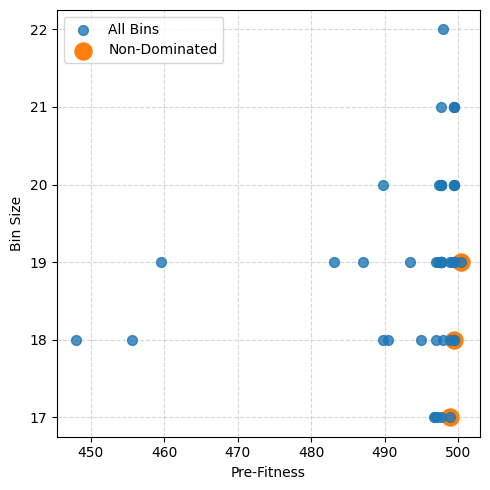

In [9]:
fibers.get_pareto_plot(save=True,output_folder=output_folder,data_name=data_name)

### Examine Feature Tracking Scores

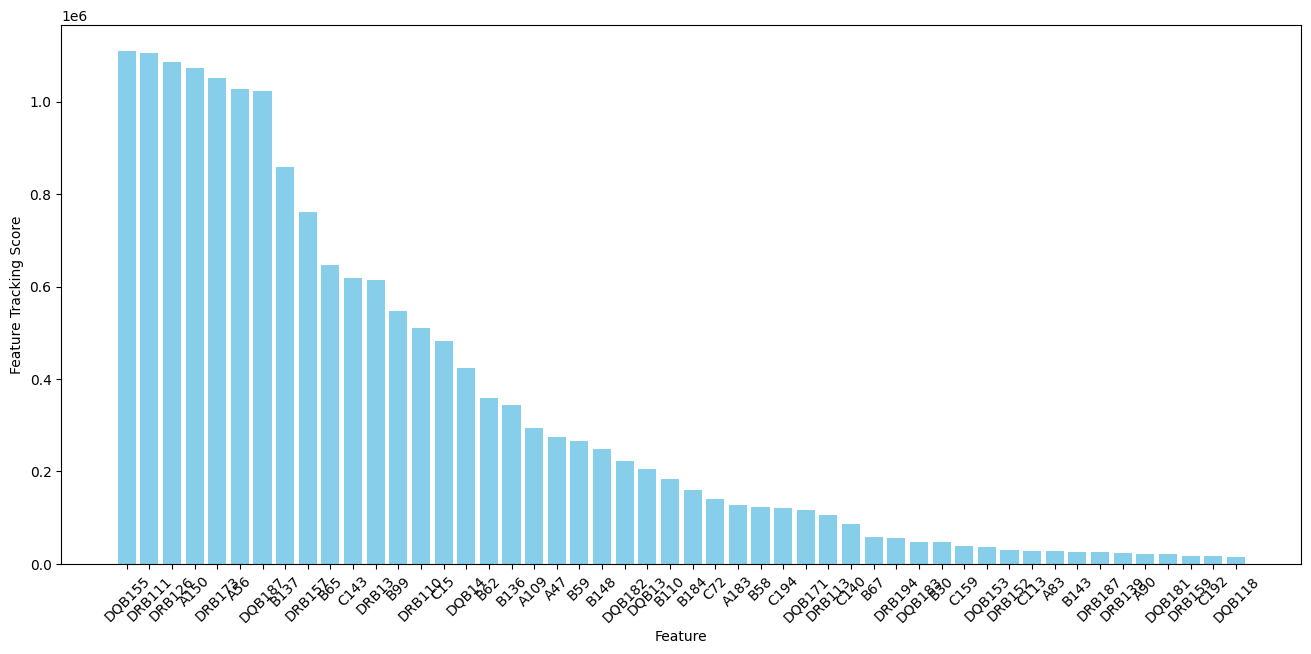

In [10]:
fibers.get_feature_tracking_plot(max_features=50,save=True,output_folder=output_folder,data_name=data_name)

### Bin Population Details
The dataframe containing all top-bin statistics/characteristics across training iterations

In [11]:
pop_df

,feature_list,group_threshold,fitness,pre_fitness,metric,p_value,bin_size,group_strata_prop,count_bt,count_at,birth_iteration,residuals_score,residuals_p_value
0,"[A109, A150, A54, A56, B110, B137, B30, B59, B...",1,1.000000,500.341720,500.341720,8.009750e-111,19,0.252566,42071,124503,48,None,None
1,"[A109, A150, A56, B110, B137, B30, B59, B62, C...",1,0.951229,499.451833,499.451833,1.250951e-110,18,0.252584,42074,124500,48,None,None
2,"[A109, A150, A56, B110, B137, B30, B59, B62, C...",1,0.904837,499.451833,499.451833,1.250951e-110,19,0.252584,42074,124500,46,None,None
3,"[A109, A150, A56, B110, B137, B30, B59, B62, C...",1,0.904837,499.451833,499.451833,1.250951e-110,19,0.252584,42074,124500,47,None,None
4,"[A109, A150, A56, B110, B136, B137, B30, B59, ...",1,0.904837,499.451833,499.451833,1.250951e-110,19,0.252584,42074,124500,46,None,None
5,"[A109, A150, A56, B110, B137, B30, B59, B62, C...",1,0.860708,499.451833,499.451833,1.250951e-110,20,0.252584,42074,124500,48,None,None
6,"[A109, A150, A56, B110, B137, B30, B59, B62, B...",1,0.860708,499.451833,499.451833,1.250951e-110,20,0.252584,42074,124500,47,None,None
7,"[A109, A150, A56, B110, B137, B30, B59, B62, C...",1,0.860708,499.451833,499.451833,1.250951e-110,20,0.252584,42074,124500,47,None,None
8,"[A109, A150, A56, B110, B137, B179, B30, B59, ...",1,0.818731,499.451833,499.451833,1.250951e-110,21,0.252584,42074,124500,47,None,None
9,"[A109, A150, A56, B110, B137, B30, B59, B62, C...",1,0.818731,499.451833,499.451833,1.250951e-110,21,0.252584,42074,124500,46,None,None


***
## Top (or Individual) Bin Examination

In [12]:
bin_index = 0 # lowest index is the bin with the highest fitness (only reports the bin ranked at the top, despite possible fitness ties for top)

In [13]:
fibers.get_bin_report(bin_index)

,0
Features in Bin:,"[A109, A150, A54, A56, B110, B137, B30, B59, B..."
Threshold:,1
Fitness,1.0
Pre-Fitness:,500.34172
Metric Score:,500.34172
p-value:,0.0
Bin Size:,19
Group Ratio:,0.252566
Count At/Below Threshold:,42071
Count Above Threshold:,124503


### Kaplan Meier Survival Plot (For Top Bin)

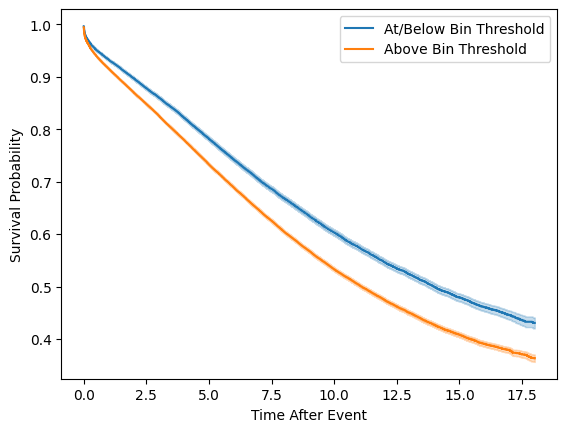

In [14]:
fibers.get_kaplan_meir(data,bin_index,save=True,output_folder=output_folder,data_name=data_name)

### Check and View Top Bin Ties

In [15]:
fibers.report_ties()


Only one top performing bin found


***
## History of Bin Evolution (Top Bin Each Generation)
### Plot: Fitness of top bin each training iteration

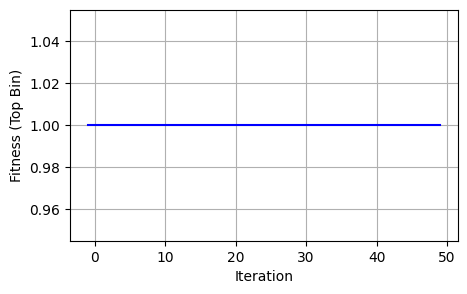

In [16]:
fibers.get_fitness_progress_plot()

### Plot: Scoring Metric and Pre-Fitness of top bin each training iteration

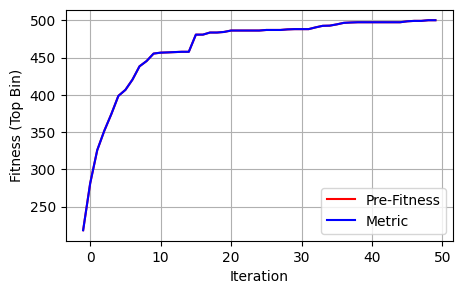

In [17]:
fibers.get_perform_progress_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Normalized Top-Bin Stats Across Training Iterations

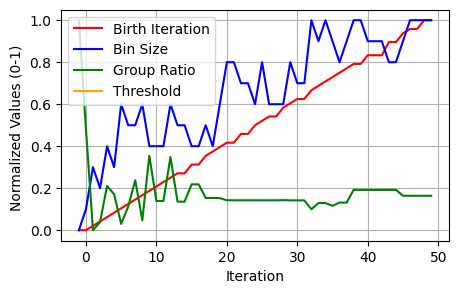

In [18]:
fibers.get_misc_progress_plot(save=True,output_folder=output_folder,data_name=data_name)

### Raw Top Bin / Generation Details

In [19]:
fibers.perform_track_df

,Iteration,Top Bin,Threshold,Fitness,Pre-Fitness,Metric,p-value,Bin Size,Group Ratio,Count At/Below Threshold,Count Below Threshold,Birth Iteration,Residuals Score,Residuals p-value,Elapsed Time
0,-1,"[B67, A127, C24, B167, DRB111, A90, DQB155, C1...",1,1.0,218.137855,218.137855,2.304479e-49,9,0.486276,81001,85573,0,None,None,29.520882
1,0,"[A90, A95, B163, B67, C113, C194, DQB155, DRB1...",1,1.0,281.196314,281.196314,4.120031e-63,10,0.341542,56892,109682,0,None,None,47.970369
2,1,"[A150, A47, A90, B184, B67, C113, C194, DQB155...",1,1.0,325.708616,325.708616,8.269417e-73,12,0.206719,34434,132140,1,None,None,53.468424
3,2,"[A150, A183, A47, A83, B184, B67, C194, DQB13,...",1,1.0,351.716151,351.716151,1.792363e-78,11,0.217555,36239,130335,2,None,None,58.942970
4,3,"[A150, A183, A47, A83, B184, C194, DQB13, DQB1...",1,1.0,374.165409,374.165409,2.318830e-83,13,0.265570,44237,122337,3,None,None,64.410846
5,4,"[A183, A47, B184, C194, DQB13, DQB155, DQB171,...",1,1.0,398.634251,398.634251,1.092050e-88,12,0.254710,42428,124146,4,None,None,69.849555
6,5,"[A150, A183, A47, A56, A83, B184, C194, DQB13,...",1,1.0,406.736391,406.736391,1.881643e-90,15,0.215076,35826,130748,5,None,None,75.308268
7,6,"[A150, A183, A47, A56, B184, C194, DQB13, DQB1...",1,1.0,420.490104,420.490104,1.908839e-93,14,0.238176,39674,126900,6,None,None,80.952848
8,7,"[A150, A183, A47, A56, B184, B58, DQB13, DQB15...",1,1.0,438.372524,438.372524,2.447085e-97,14,0.273344,45532,121042,7,None,None,86.505170
9,8,"[A150, A47, A56, B136, B184, B58, DQB13, DQB15...",1,1.0,445.435373,445.435373,7.104212e-99,15,0.220094,36662,129912,8,None,None,92.150976


***
## Transforming Bins Into New Features (Feature Learning)

In [20]:
tdf = fibers.transform(data)
tdf.to_csv(output_folder+'/'+'Transformed_'+data_name+'.csv', index=False)
tdf

,Bin_0,Bin_1,Bin_2,Bin_3,Bin_4,Bin_5,Bin_6,Bin_7,Bin_8,Bin_9,...,Bin_42,Bin_43,Bin_44,Bin_45,Bin_46,Bin_47,Bin_48,Bin_49,graftyrs,grf_fail
0,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,5,6,6,5,3.233490,1
1,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,6,7,7,6,16.003176,0
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,17.002519,0
3,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,5,1.319680,1
4,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,6,7,7,6,6.349250,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166569,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,5,5,5,0.501040,0
166570,3,3,3,3,3,3,3,3,3,3,...,2,3,3,3,3,3,3,2,0.501040,0
166571,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,3,3,3,3,0.501040,0
166572,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,3,0.501040,0


In [ ]:
def hazard_ratio(data_without_nan, bin_scores, bins, covariates, index=0):
    sorted_bin_scores = dict(sorted(bin_scores.items(), key=lambda item: item[1], reverse=True))
    sorted_bin_list = list(sorted_bin_scores.keys())
    #sorted_bin_feature_importance_values = list(sorted_bin_scores.values())
    Bin = bins[sorted_bin_list[index]]
    d_data = data_without_nan.copy()
    d_data['Bin'] = d_data[Bin].sum(axis=1)
    column_values = d_data['Bin'].to_list()
    for r in range(0, len(column_values)):
        if column_values[r] > 0:
            column_values[r] = 1
    d_data['Bin'] = column_values
    coxmodeldata =  d_data[covariates + ["grf_fail", "graftyrs", "Bin"]]
    cat_columns = coxmodeldata.select_dtypes(['object']).columns
    coxmodeldata[cat_columns] = coxmodeldata[cat_columns].apply(lambda x: pd.factorize(x)[0])
    cph = CoxPHFitter()
    cph.fit(coxmodeldata,"graftyrs",event_col="grf_fail", show_progress=True)
    return cph.summary
